In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from utils.dataset import SpectrogramDataset

# Load the dataset
metadata_path = Path('e:/PWr/deepfakes/datasets/track1_2-train/Track1.2/train/spect/metadata.pt')
dataset = SpectrogramDataset(metadata_path)

# Analyze the dataset
all_spectrograms = []
for i in range(len(dataset)):
  data = dataset[i]
  spec = data[0]
  all_spectrograms.append(spec.numpy())

all_spectrograms = np.array(all_spectrograms)
mean_spectrogram = np.mean(all_spectrograms)
variance_spectrogram = np.var(all_spectrograms)

print(f"Mean of the spectrograms in the dataset: {mean_spectrogram}")
print(f"Variance of the spectrograms in the dataset: {variance_spectrogram}")

# Plot a spectrogram from the dataset
spec, label = dataset[0]
epsilon = 1e-10
S_db = 10 * np.log10(spec.numpy() + epsilon)

plt.figure(figsize=(10, 6))
librosa.display.specshow(S_db, sr=22050, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram from Dataset')
plt.show()

Number of unique labels in the dataset: 2
Labels in the dataset: {0, 1}
Number of samples in the dataset: 27084
Number of samples for each label in the dataset:
{0: 24072, 1: 3012}


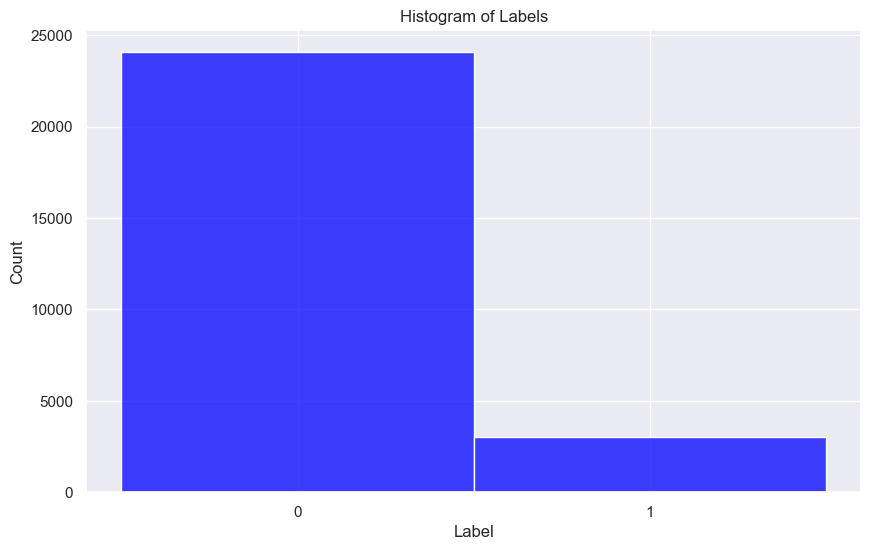

Minimum audio length: 80
Maximum audio length: 80
Average audio length: 80.0
Median audio length: 80.0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import librosa

labels = dataset.labels
print(f"Number of unique labels in the dataset: {len(set(labels))}")
print(f"Labels in the dataset: {set(labels)}")
print(f"Number of samples in the dataset: {len(labels)}")
print(f"Number of samples for each label in the dataset:")
print({label: labels.count(label) for label in set(labels)})

sns.set_theme(style='darkgrid')
# Plot histogram of labels
plt.figure(figsize=(10, 6))
sns.histplot(labels, bins=2, color='blue', discrete=True)
plt.title('Histogram of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.show()

# Histogram of audio lengths
file_paths = dataset.file_paths
audio_lengths = []
for i, audio_path in enumerate(file_paths):
    audio_length = librosa.get_duration(path=str(audio_path))
    audio_lengths.append(audio_length)

plt.figure(figsize=(10, 6))
sns.histplot(audio_lengths, bins=20, color='blue', discrete=True)
plt.title('Histogram of Audio Lengths')
plt.xlabel('Audio Length (seconds)')
plt.ylabel('Count')
plt.show()

